In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
filename = "log1.txt"
lines = open(filename, 'r').readlines()

In [3]:
seqs = []

while lines[0][:9] == "Recherche":
    seqs += [lines[0].split(" ")[4][:7]]
    lines = lines[1:]

lines = lines[len(seqs):]

print("Var parameters", lines[0])
lines = lines[1:]

niter = int((len(lines) - 1) / (2 + len(seqs)))

seqs += ["MEAN"]
print("niter = ",niter)

Var parameters Parameters : {'openGap': [10.0, 25.0], 'extendGap': [0.5, 5.0]}

niter =  50


In [4]:
nameparams = lines[0].split("{")[1][:-2].split(", ")
nameparams = [p.split(" ")[0][1:-2] for p in nameparams]
namecols = nameparams + ["SPS", "time"]
namecols

dico = dict()
for n in namecols:
    dico[n] = [0]
    
DF = [pd.DataFrame(dico, index=np.arange(0, niter)).astype("float") for seq in seqs]

In [5]:
for i in range(0, niter):
    params = lines[0].split("{")[1][:-2].split(", ")
    params = [p.split(" ")[1] for p in params]
    tottime = 0
    
    for k in range(1, len(seqs)):
        DF[k - 1].set_value(i, "time", float(lines[k].split(" ")[2][:-2]))
        tottime += float(lines[k].split(" ")[2][:-2])
        DF[k - 1].set_value(i, "SPS", float(lines[k].split(" ")[1]))
        for l in range(0, len(params)):
            DF[k - 1].set_value(i, nameparams[l], float(params[l]))
            
    DF[-1].set_value(i, "time", tottime)
    DF[-1].set_value(i, "SPS", float(lines[len(seqs)].split(" ")[-1]))
    for l in range(0, len(params)):
        DF[-1].set_value(i, nameparams[l], float(params[l]))       
              
    lines = lines[1 + len(seqs):]

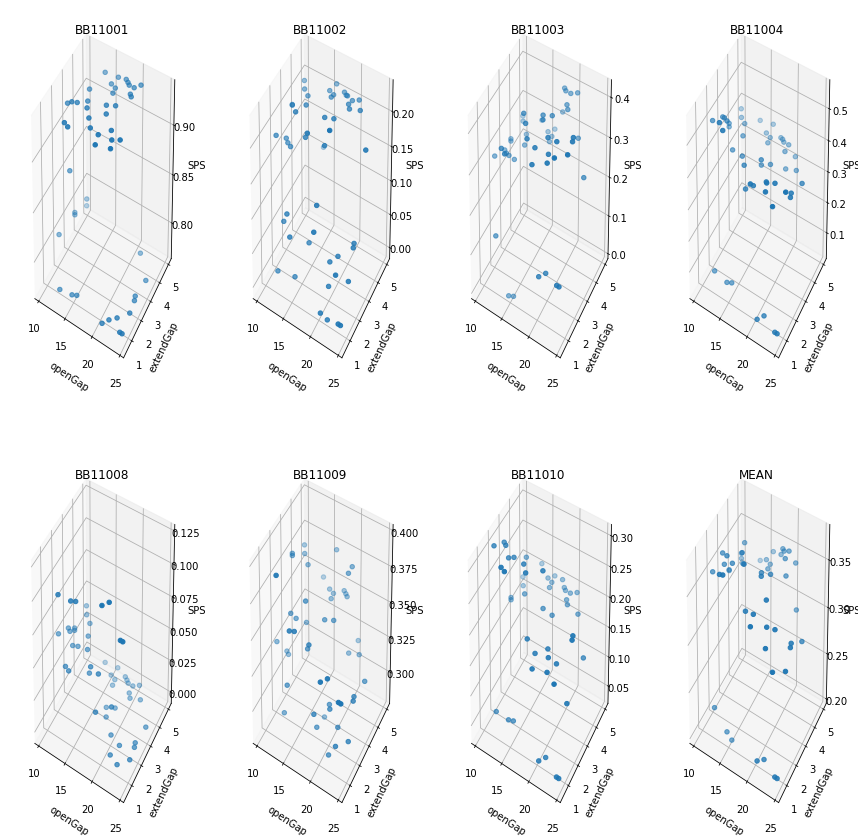

In [6]:
fig = plt.figure(figsize = (15, 15))

for k in range(0, len(seqs)):
    ax = fig.add_subplot(2, 4, k+1, projection='3d')
    ax.scatter(DF[k][nameparams[0]], DF[k][nameparams[1]], DF[k]["SPS"])
    ax.set_xlabel(nameparams[0])
    ax.set_ylabel(nameparams[1])
    ax.set_zlabel('SPS')
    ax.set_title(seqs[k])
plt.show()